In [3]:
import os
os.chdir("/home/comsee/Internship_Antony/neuvisys/neuvisys-analysis")

In [4]:
%load_ext autoreload
%autoreload 2

import os
import shutil
import pprint
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pdf2image import convert_from_path
from src.spiking_network.network.neuvisys import SpikingNetwork
from src.spiking_network.analysis.network_display import (
    display_network,
    load_array_param,
    complex_cells_directions,
    complex_cell_disparities,
)
from src.spiking_network.analysis.network_statistics import (
    rf_matching,
    direction_norm_length,
    orientation_norm_length,
    direction_selectivity,
    orientation_selectivity,
    update_dataframe,
    disparity_histogram,
    inhibition_weight_against_orientation,
    inhibition_weight_against_disparity,
    visualize_potentials,
    amount_of_excitation_inhibition, 
    visualize_inhibition_weights,
    visualize_td_inhibition,
    visualize_histogram_of_potentials,
    visualize_sum_inhibition_weights,
    visualize_evolution_of_inhibition,
    visualize_td_sum_inhibition,
    visualize_total_inhibition_evolution,
    visualize_total_tdinhibition_evolution, 
    suppression_metric,
    average_over_orientations,
    averaged_graph,
    averaged_graph2,
    orientations_graph,
    calculate_similitude_tuning, 
    average_orientations_numbers_cells,
    calculate_similitude_preferred_orientation,
    check_steepness,
    compare_inhibitions,
    
)

from src.spiking_network.analysis.modif_inhib_visual import (
    visualize_td_sum_inhibition2,
    visualize_sum_inhibition_weights2,
    visualize_total_inhibition_evolution2,
    visualize_total_tdinhibition_evolution2,
    td_inhibition_characterization
)
from src.spiking_network.analysis.spike_train import (
    spike_trains,
    raster_plot,
    event_plot,
    time_histogram,
    spike_rate_histogram,
    isi_histogram,
    instantaneous_rates,
    correlation_coeficient_matrix,
    time_histogram_comparison,
)
from src.spiking_network.gabor.gabbor_fitting import (
    create_gabor_basis,
    hists_preferred_orientations,
    plot_preferred_orientations,
)
from src.spiking_network.analysis.parameter_analysis import (
    correlation_matrix,
    scatter_mat,
)

os.chdir("/home/comsee/Internship_Antony/neuvisys/neuvisys-analysis/src")
home = "/home/comsee/"

SMALL_SIZE = 20
MEDIUM_SIZE = 25
BIGGER_SIZE = 30

plt.rc('figure', figsize=(30, 8))
plt.rc('font', size=SMALL_SIZE)  # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE,
       labelsize=MEDIUM_SIZE)  # fontsize of the axes title, fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)  # legend fontsize

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
networks_path = "/home/comsee/Internship_Antony/neuvisys/neuvisys-analysis/configuration"
#path = networks_path + "/other_dataset_training/lateral_topdown/shared/rotated/new_rot/new_dataset/rotated_grey_inhib2/"
path = networks_path + "/other_dataset_training/lateral_topdown/shared/rotated/new_rot/new_dataset/rotated_grey1_retryhigh/"
#path = networks_path + "/other_dataset_training/lateral_topdown/shared/rotated/new_rot/new_dataset/rotated_grey_RFslow_syn/"
spinet = SpikingNetwork(path)

Simple cells weights


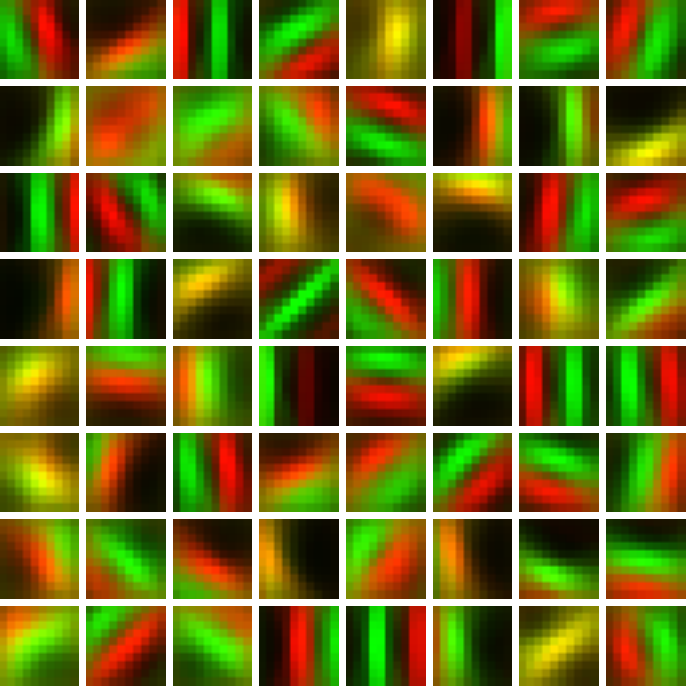

Complex cells weights (average over all simple cells)


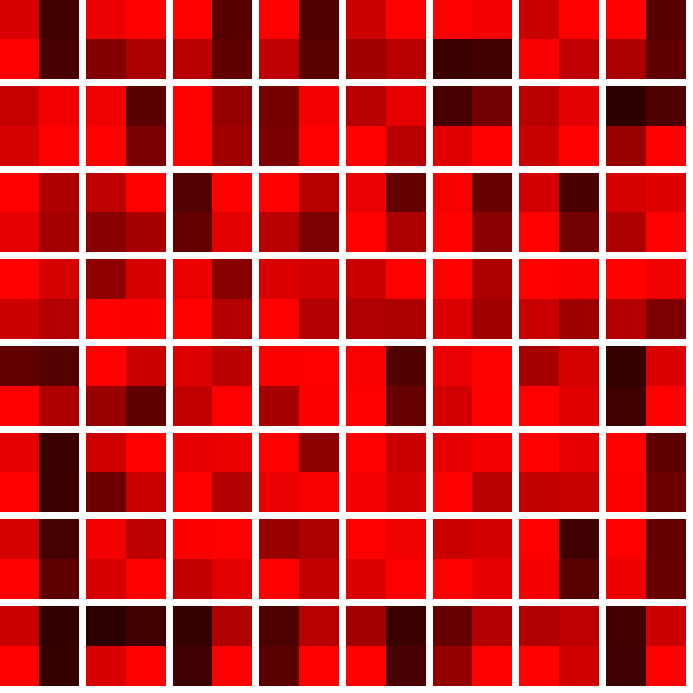

In [6]:
display_network([spinet])

print("Simple cells weights")
if spinet.conf["nbCameras"] == 2:
    display(convert_from_path(path + "figures/0/weight_sharing_combined.pdf")[0])
else:
    display(convert_from_path(path + "figures/0/weight_sharing_0.pdf")[0])

print("Complex cells weights (average over all simple cells)")
for i in range(spinet.l_shape[1, 2]):
    display(convert_from_path(path + "figures/1/complex_weights_depth_" + str(i) + ".pdf")[0])
    break

In [7]:
angles = [0, 23, 45, 68, 90, 113, 135, 158]

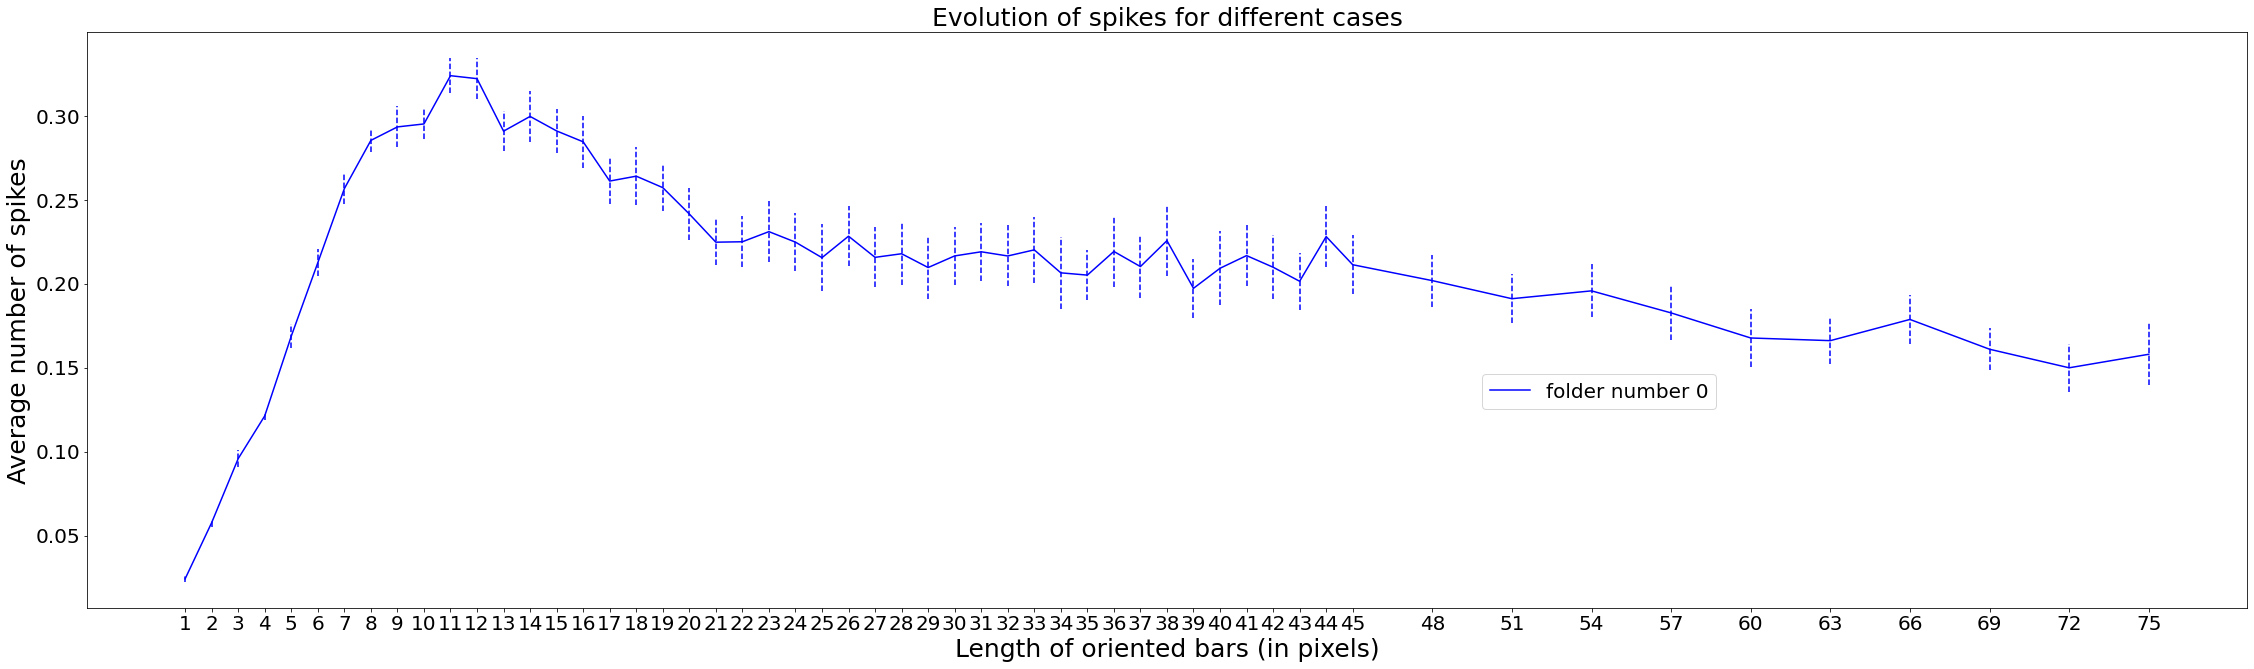

In [15]:
load_folder = "/home/comsee/Internship_Antony/neuvisys/save_files/oris/noinhib_ori/"
load_folder2 = "/home/comsee/Internship_Antony/neuvisys/save_files/oris/newtuned_ori/"
load_folder3="/home/comsee/Internship_Antony/neuvisys/save_files/oris/with_speeds/"
load_folder4 = "/home/comsee/Internship_Antony/neuvisys/save_files/oris/latshuffled/"
load_folder5 = "/home/comsee/Internship_Antony/neuvisys/save_files/oris/topdownshuffled/"
load_folder6 = "/home/comsee/Internship_Antony/neuvisys/save_files/oris/topdownshuffled400/"
load_folder7 = "/home/comsee/Internship_Antony/neuvisys/save_files/oris/topdown400/"
load_folder8 = "/home/comsee/Internship_Antony/neuvisys/save_files/oris/with_speeds_nonsynth/"
load_folder9 = "/home/comsee/Internship_Antony/neuvisys/save_files/oris/topdownsolo/"
load_folder10 = "/home/comsee/Internship_Antony/neuvisys/save_files/oris/latsolo/"
load_folder11 = "/home/comsee/Internship_Antony/neuvisys/save_files/oris/newtuned_oriLR2/"
load_folder12 = "/home/comsee/Internship_Antony/neuvisys/save_files/oris/vertical/"

#load_folders = [load_folder, load_folder2, load_folder9, load_folder10]
load_folders = [load_folder3]

averaged_graph2(load_folders, 0, with_speed = True, n_thickness = 3, thickness = 1, speed = 0, n_speeds = 3, n_displays = 55, avg = True, start_space = 45, space = 3, n_simulation = 5)

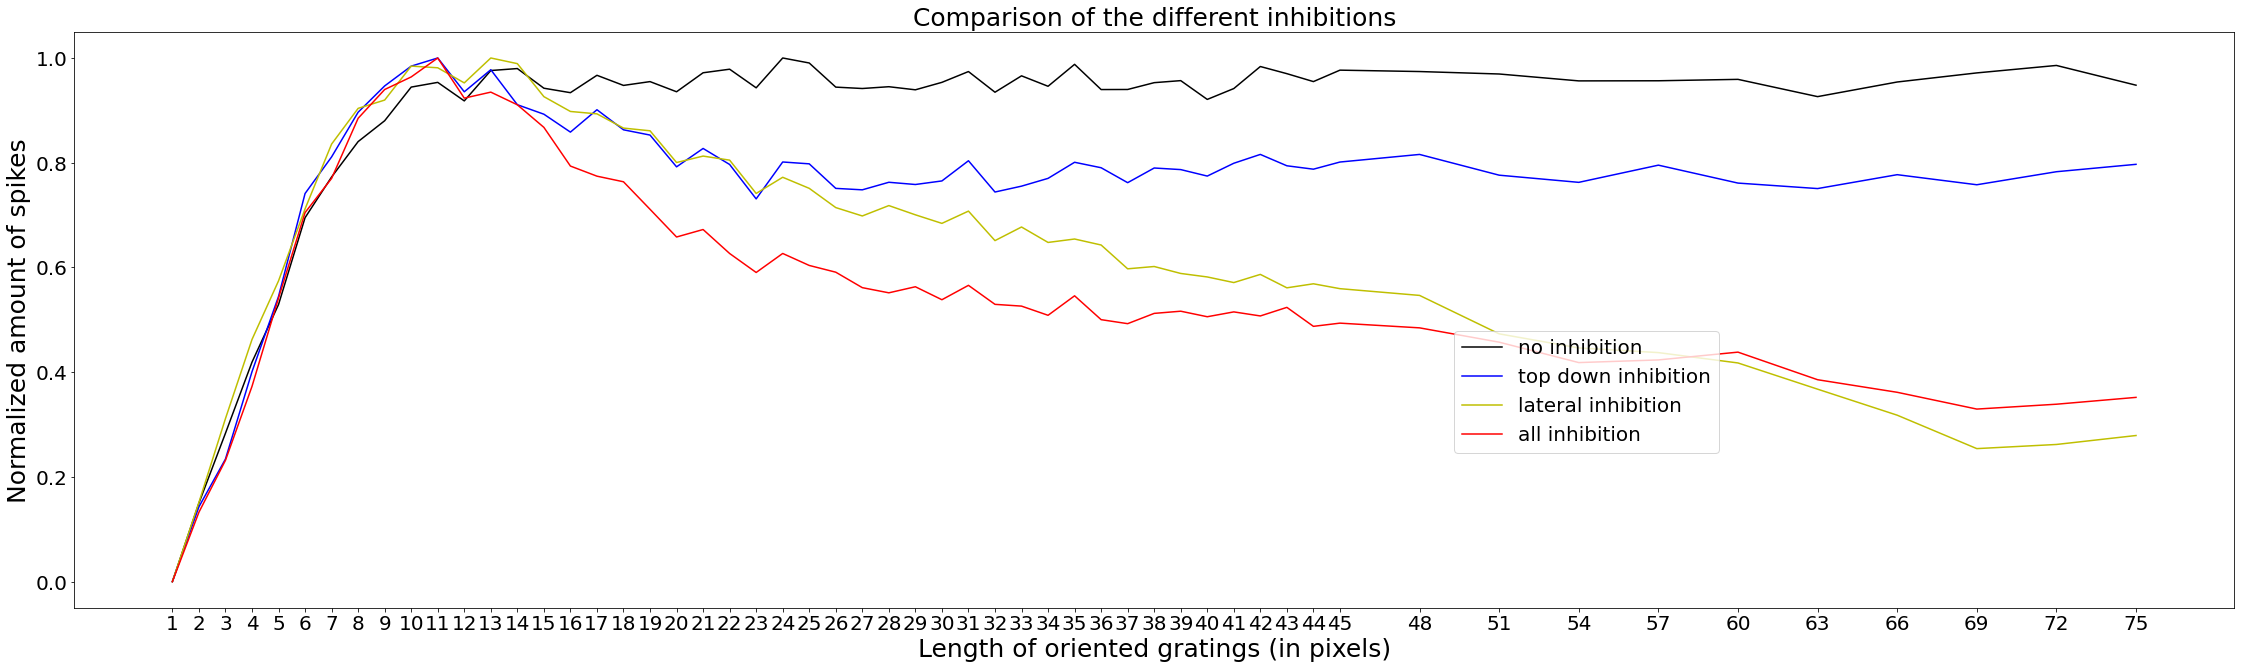

In [232]:
compare_inhibitions(load_folder2, load_folder9, load_folder10, load_folder, 3)